In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from scipy.stats import sem
from scipy.stats import spearmanr, linregress
import scikit_posthocs as sp

sc._settings.ScanpyConfig(n_jobs=-1)

In [2]:
# Specify the path to your Helvetica Neue Regular font file
helvetica_neue_path = "/home/mstier/.local/share/fonts/HelveticaNeue-Regular.ttf"

# Create a FontProperties object using the font path
prop_neue = fm.FontProperties(fname=helvetica_neue_path)

# Get the font name from FontProperties
helvetica_neue_name = prop_neue.get_name()

# Define custom context for font sizes and line thickness using Seaborn
custom_context = {
    'font.size': 7,                    # General font size for the plot
    'axes.labelsize': 7,               # Font size for axis labels
    'axes.titlesize': 7,               # Font size for titles
    'legend.fontsize': 7,              # Font size for legend
    'axes.linewidth': 0.6,             # Line width for axes spines
    'grid.linewidth': 0.6,             # Line width for grid lines
    'lines.linewidth': 0.6,            # Line width for plot lines
    'lines.markersize': 3,             # Size of markers in scatter/line plots
    'patch.linewidth': 0.6,            # Line width for boxplot edges
    'xtick.major.size': 3,             # Length of major ticks on x-axis
    'ytick.major.size': 3,             # Length of major ticks on y-axis
    'xtick.labelsize': 7,              # Font size for x-tick labels
    'ytick.labelsize': 7,              # Font size for y-tick labels
    'legend.title_fontsize': 7,        # Font size for legend title
}

# Define custom style for aesthetic elements like background, grid, and spines using Seaborn
custom_style = {
    'axes.facecolor': 'white',         # Background color of the axes
    'axes.edgecolor': 'black',         # Color of the border around the plot
    'axes.grid': False,                # Disable gridlines
    'grid.color': '#EAEAEA',           # Color of grid lines
    'grid.linestyle': '--',            # Style of the grid lines (dashed)
    'xtick.color': 'black',            # Color of x-axis tick labels
    'ytick.color': 'black',            # Color of y-axis tick labels
    'ytick.left': True,
    'xtick.bottom': True,
    'xtick.direction': 'out',          # Direction of x-axis ticks
    'ytick.direction': 'out',          # Direction of y-axis ticks
    'axes.spines.left': True,          # Show the left spine (border)
    'axes.spines.bottom': True,        # Show the bottom spine (border)
    'axes.spines.right': False,        # Hide the right spine
    'axes.spines.top': False,          # Hide the top spine
}

# Use set_theme and pass rc with font settings
sns.set_theme(
    context=custom_context,
    style=custom_style,
    rc={
        'font.family': 'sans-serif',                   # Set family to sans-serif
        'font.sans-serif': [helvetica_neue_name],      # Specify Helvetica Neue as the sans-serif font
        'font.size': 7,                                # General font size for the plot
        'axes.labelsize': 7,                           # Font size for axis labels
        'axes.titlesize': 7,                           # Font size for titles
        'legend.fontsize': 7,                          # Font size for legend
        'xtick.labelsize': 7,                          # Font size for x-tick labels
        'ytick.labelsize': 7                           # Font size for y-tick labels
    }
)

plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# Set the base output directory for all figures
output_dir = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/'

In [22]:
# Read the CSV file
cbc_summary_df = pd.read_csv('/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/cbc_summary.csv')

Kruskal-Wallis H-statistic: 20.78, p-value: 0.0000
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.004105  0.128542
CI-Sep  0.004105  1.000000  0.000127
NHC     0.128542  0.000127  1.000000



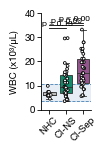

In [23]:
# Filter the data: include all NHC samples and only day 2 samples for CI-NS and CI-Sep
filtered_df = cbc_summary_df[(cbc_summary_df['Group'] == 'NHC') | 
                             ((cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])) & (cbc_summary_df['Day'] == 2))]

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = ['#BBBBBB', '#009E73', '#9F4A96']

# Define new color for the reference range
ref_color = 'lightsteelblue'
darker_ref_color = 'steelblue'

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and dashed lines first (to be behind the boxplot)
ax.axhspan(3.71, 10.67, color=ref_color, alpha=0.3, zorder=0)
ax.axhline(y=3.71, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)
ax.axhline(y=10.67, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)

# Plot box plot
sns.boxplot(
    data=filtered_df, x='Group', y='WBC', order=group_order,
    palette=group_palette, ax=ax, width=0.75, linewidth=0.6,
    fliersize=0, zorder=2  # Hide outliers, set zorder
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='WBC', order=group_order,
    jitter=True, marker='o', size=2, color='white', 
    edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('WBC (x10³/μL)')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 40)
ax.set_yticks(np.arange(0, 41, 10))

# Remove title
ax.set_title('')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['WBC'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['WBC'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['WBC']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='WBC', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 34  # Start position for comparison bars
    offset_increment = 1  # Incremental offset for each comparison bar

    # Define pairs for pairwise comparison bars
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    # Iterate through pairs and add lines if Dunn's p < 0.25
    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]

        if p_val < 0.25:
            # Calculate the y-position for the current bar
            current_y = base_y + (idx * offset_increment)

            # Add comparison line
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)

            # Add p-value text
            ax.text((start + end) / 2, current_y + 0.5, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig(f'{output_dir}wbc_d2.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 21.53, p-value: 0.0000
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.057081  0.007538
CI-Sep  0.057081  1.000000  0.000017
NHC     0.007538  0.000017  1.000000



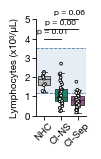

In [52]:
# Filter the data: include all NHC samples and only day 2 samples for CI-NS and CI-Sep
filtered_df = cbc_summary_df[(cbc_summary_df['Group'] == 'NHC') | 
                             ((cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])) & (cbc_summary_df['Day'] == 2))]

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = ['#BBBBBB', '#009E73', '#9F4A96']

# Define new color for the reference range
ref_color = 'lightsteelblue'
darker_ref_color = 'steelblue'

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and dashed lines first (to be behind the boxplot)
ax.axhspan(1.15, 3.52, color=ref_color, alpha=0.3, zorder=0)
ax.axhline(y=1.15, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)
ax.axhline(y=3.52, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)

# Plot box plot
sns.boxplot(
    data=filtered_df, x='Group', y='LY#', order=group_order,
    palette=group_palette, ax=ax, width=0.75, linewidth=0.6,
    fliersize=0, zorder=2  # Hide outliers, set zorder
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='LY#', order=group_order,
    jitter=True, marker='o', size=2, color='white', 
    edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Lymphocytes (x10³/μL)')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 5)
ax.set_yticks(np.arange(0, 6, 1))

# Remove title
ax.set_title('')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['LY#'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['LY#'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['LY#']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='LY#', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 4  # Start position for comparison bars
    offset_increment = 0.5  # Incremental offset for each comparison bar

    # Define pairs for pairwise comparison bars
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    # Iterate through pairs and add lines if Dunn's p < 0.25
    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]

        if p_val < 0.25:
            # Calculate the y-position for the current bar
            current_y = base_y + (idx * offset_increment)

            # Add comparison line
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)

            # Add p-value text
            ax.text((start + end) / 2, current_y + 0.2, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig(f'{output_dir}lymphocytes_d2.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 6.07, p-value: 0.0480
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.119915
CI-Sep  1.000000  1.000000  0.041869
NHC     0.119915  0.041869  1.000000



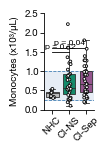

In [25]:
# Filter the data: include all NHC samples and only day 2 samples for CI-NS and CI-Sep
filtered_df = cbc_summary_df[(cbc_summary_df['Group'] == 'NHC') | 
                             ((cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])) & (cbc_summary_df['Day'] == 2))]

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = ['#BBBBBB', '#009E73', '#9F4A96']

# Define new color for the reference range
ref_color = 'lightsteelblue'
darker_ref_color = 'steelblue'

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and dashed lines first (to be behind the boxplot)
ax.axhspan(0.25, 0.99, color=ref_color, alpha=0.3, zorder=0)  # Reference range for MO#
ax.axhline(y=0.25, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)
ax.axhline(y=0.99, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)

# Plot box plot
sns.boxplot(
    data=filtered_df, x='Group', y='MO#', order=group_order,
    palette=group_palette, ax=ax, width=0.75, linewidth=0.6,
    fliersize=0, zorder=2  # Hide outliers, set zorder
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='MO#', order=group_order,
    jitter=True, marker='o', size=2, color='white', 
    edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Monocytes (x10³/μL)')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 2)
ax.set_yticks(np.arange(0, 3, 0.5))

# Remove title
ax.set_title('')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['MO#'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['MO#'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['MO#']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='MO#', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 1.5  # Start position for comparison bars
    offset_increment = 0.1  # Incremental offset for each comparison bar

    # Define pairs for pairwise comparison bars
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    # Iterate through pairs and add lines if Dunn's p < 0.25
    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]

        if p_val < 0.25:
            # Calculate the y-position for the current bar
            current_y = base_y + (idx * offset_increment)

            # Add comparison line
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)

            # Add p-value text
            ax.text((start + end) / 2, current_y + 0.05, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig(f'{output_dir}monocytes_d2.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 25.73, p-value: 0.0000
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.002202  0.039611
CI-Sep  0.002202  1.000000  0.000009
NHC     0.039611  0.000009  1.000000



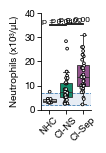

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

# Filter the data: include all NHC samples and only day 2 samples for CI-NS and CI-Sep
filtered_df = cbc_summary_df[(cbc_summary_df['Group'] == 'NHC') | 
                             ((cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])) & (cbc_summary_df['Day'] == 2))].copy()

# Ensure 'NE#' is numeric and drop rows with NaN or non-numeric values
filtered_df['NE#'] = pd.to_numeric(filtered_df['NE#'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['NE#'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = ['#BBBBBB', '#009E73', '#9F4A96']

# Define new color for the reference range
ref_color = 'lightsteelblue'
darker_ref_color = 'steelblue'

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and dashed lines for the reference range
ax.axhspan(1.85, 6.72, color=ref_color, alpha=0.3, zorder=0)
ax.axhline(y=1.85, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)
ax.axhline(y=6.72, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)

# Plot box plot
sns.boxplot(
    data=filtered_df, x='Group', y='NE#', order=group_order,
    palette=group_palette, ax=ax, width=0.75, linewidth=0.6,
    fliersize=0, zorder=2  # Hide outliers, set zorder
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='NE#', order=group_order,
    jitter=True, marker='o', size=2, color='white', 
    edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Neutrophils (x10³/μL)')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 40)
ax.set_yticks(np.arange(0, 41, 10))

# Remove title
ax.set_title('')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['NE#'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['NE#'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['NE#']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='NE#', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 35  # Start position for comparison bars
    offset_increment = 0.5  # Incremental offset for each comparison bar

    # Define pairs for pairwise comparison bars
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    # Iterate through pairs and add lines if Dunn's p < 0.25
    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]

        if p_val < 0.25:
            # Calculate the y-position for the current bar
            current_y = base_y + (idx * offset_increment)

            # Add comparison line
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)

            # Add p-value text
            ax.text((start + end) / 2, current_y + 0.2, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig(f'{output_dir}neutrophils_d2.svg', format='svg')
plt.show()

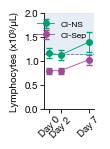

In [27]:
# Filter the data: include only CI-NS and CI-Sep
filtered_df = cbc_summary_df[cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])].copy()

# Ensure 'LY#' is numeric and drop rows with NaN or non-numeric values
filtered_df.loc[:, 'LY#'] = pd.to_numeric(filtered_df['LY#'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['LY#'])

# Calculate means and SEM for each group and day
mean_sem_df = filtered_df.groupby(['Group', 'Day'])['LY#'].agg(['mean', sem]).reset_index()

# Define colors for CI-NS and CI-Sep
group_colors = {'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and bottom dashed line for the reference range
ax.axhspan(1.15, 2.0, color='lightsteelblue', alpha=0.3, zorder=0)
ax.axhline(y=1.15, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)

# Plot the line chart for each group
for group in ['CI-NS', 'CI-Sep']:
    subset = mean_sem_df[mean_sem_df['Group'] == group]
    ax.errorbar(
        subset['Day'], subset['mean'], yerr=subset['sem'], label=group,
        color=group_colors[group], fmt='-o', capsize=2, linewidth=0.6, markersize=4
    )

# Set x-axis limits and labels with extra space
ax.set_xlim(-1, 8)  # Extends x-axis slightly before day 0 and after day 7
ax.set_xticks([0, 2, 7])
ax.set_xticklabels(['Day 0', 'Day 2', 'Day 7'], rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Lymphocytes (x10³/μL)', fontsize=7)

# Adjust y-axis limits and ticks
ax.set_ylim(0, 2)
ax.set_yticks(np.arange(0, 2.5, 0.5))

# Adjust tick parameters
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Add legend
ax.legend(title='', fontsize=6, frameon=False, loc='upper right')

# Save and show the plot
plt.savefig(f'{output_dir}lymphocytes_timecourse.svg', format='svg', bbox_inches='tight')
plt.show()

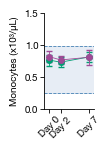

In [10]:
# Filter the data: include only CI-NS and CI-Sep
filtered_df = cbc_summary_df[cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])].copy()

# Ensure 'MO#' is numeric and drop rows with NaN or non-numeric values
filtered_df.loc[:, 'MO#'] = pd.to_numeric(filtered_df['MO#'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['MO#'])

# Calculate means and SEM for each group and day
mean_sem_df = filtered_df.groupby(['Group', 'Day'])['MO#'].agg(['mean', sem]).reset_index()

# Define colors for CI-NS and CI-Sep
group_colors = {'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and bottom dashed line for the reference range
ax.axhspan(0.25, 0.99, color='lightsteelblue', alpha=0.3, zorder=0)
ax.axhline(y=0.25, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)
ax.axhline(y=0.99, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)

# Plot the line chart for each group
for group in ['CI-NS', 'CI-Sep']:
    subset = mean_sem_df[mean_sem_df['Group'] == group]
    ax.errorbar(
        subset['Day'], subset['mean'], yerr=subset['sem'], label=group,
        color=group_colors[group], fmt='-o', capsize=2, linewidth=0.6, markersize=4
    )

# Set x-axis limits and labels with extra space
ax.set_xlim(-1, 8)  # Extends x-axis slightly before day 0 and after day 7
ax.set_xticks([0, 2, 7])
ax.set_xticklabels(['Day 0', 'Day 2', 'Day 7'], rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Monocytes (x10³/μL)', fontsize=7)

# Adjust y-axis limits and ticks
ax.set_ylim(0, 1.5)
ax.set_yticks(np.arange(0, 1.6, 0.5))

# Adjust tick parameters
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Save and show the plot
plt.savefig(f'{output_dir}monocytes_timecourse.svg', format='svg')
plt.show()

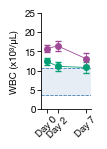

In [53]:
# Filter the data: include only CI-NS and CI-Sep
filtered_df = cbc_summary_df[cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])].copy()

# Ensure 'WBC' is numeric and drop rows with NaN or non-numeric values
filtered_df.loc[:, 'WBC'] = pd.to_numeric(filtered_df['WBC'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['WBC'])

# Calculate means and SEM for each group and day
mean_sem_df = filtered_df.groupby(['Group', 'Day'])['WBC'].agg(['mean', sem]).reset_index()

# Define colors for CI-NS and CI-Sep
group_colors = {'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and bottom dashed line for the reference range
ax.axhspan(3.71, 10.67, color='lightsteelblue', alpha=0.3, zorder=0)
ax.axhline(y=3.71, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)
ax.axhline(y=10.67, linestyle='--', color=darker_ref_color, linewidth=0.6, zorder=0)

# Plot the line chart for each group
for group in ['CI-NS', 'CI-Sep']:
    subset = mean_sem_df[mean_sem_df['Group'] == group]
    ax.errorbar(
        subset['Day'], subset['mean'], yerr=subset['sem'], label=group,
        color=group_colors[group], fmt='-o', capsize=2, linewidth=0.6, markersize=4
    )

# Set x-axis limits and labels with extra space
ax.set_xlim(-1, 8)  # Extends x-axis slightly before day 0 and after day 7
ax.set_xticks([0, 2, 7])
ax.set_xticklabels(['Day 0', 'Day 2', 'Day 7'], rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('WBC (x10³/μL)', fontsize=7)

# Adjust y-axis limits and ticks
ax.set_ylim(0, 25)
ax.set_yticks(np.arange(0, 26, 5))

# Adjust tick parameters
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Save and show the plot
plt.savefig(f'{output_dir}wbc_timecourse.svg', format='svg')
plt.show()

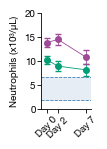

In [12]:
# Filter the data: include only CI-NS and CI-Sep
filtered_df = cbc_summary_df[cbc_summary_df['Group'].isin(['CI-NS', 'CI-Sep'])].copy()

# Ensure 'NE#' is numeric and drop rows with NaN or non-numeric values
filtered_df.loc[:, 'NE#'] = pd.to_numeric(filtered_df['NE#'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['NE#'])

# Calculate means and SEM for each group and day
mean_sem_df = filtered_df.groupby(['Group', 'Day'])['NE#'].agg(['mean', sem]).reset_index()

# Define colors for CI-NS and CI-Sep
group_colors = {'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Add the shaded region and bottom dashed line for the reference range
ax.axhspan(1.85, 6.72, color='lightsteelblue', alpha=0.3, zorder=0)
ax.axhline(y=1.85, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)
ax.axhline(y=6.72, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)

# Plot the line chart for each group
for group in ['CI-NS', 'CI-Sep']:
    subset = mean_sem_df[mean_sem_df['Group'] == group]
    ax.errorbar(
        subset['Day'], subset['mean'], yerr=subset['sem'], label=group,
        color=group_colors[group], fmt='-o', capsize=2, linewidth=0.6, markersize=4
    )

# Set x-axis limits and labels with extra space
ax.set_xlim(-1, 8)  # Extends x-axis slightly before day 0 and after day 7
ax.set_xticks([0, 2, 7])
ax.set_xticklabels(['Day 0', 'Day 2', 'Day 7'], rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Neutrophils (x10³/μL)', fontsize=7)

# Adjust y-axis limits and ticks
ax.set_ylim(0, 20)
ax.set_yticks(np.arange(0, 21, 5))

# Adjust tick parameters
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Save and show the plot
plt.savefig(f'{output_dir}neutrophils_timecourse.svg', format='svg')
plt.show()

Naïve - Kruskal-Wallis H-statistic: 3.49, p-value: 0.1745
Naïve - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep      NHC
CI-NS   1.000000  0.705648  1.00000
CI-Sep  0.705648  1.000000  0.23973
NHC     1.000000  0.239730  1.00000

Eff/EM - Kruskal-Wallis H-statistic: 0.99, p-value: 0.6111
Eff/EM - Dunn’s Post-hoc Test Results:
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0

CM - Kruskal-Wallis H-statistic: 2.12, p-value: 0.3463
CM - Dunn’s Post-hoc Test Results:
        CI-NS   CI-Sep      NHC
CI-NS     1.0  1.00000  1.00000
CI-Sep    1.0  1.00000  0.48462
NHC       1.0  0.48462  1.00000

Treg - Kruskal-Wallis H-statistic: 1.18, p-value: 0.5537
Treg - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep  NHC
CI-NS   1.000000  0.834564  1.0
CI-Sep  0.834564  1.000000  1.0
NHC     1.000000  1.000000  1.0

Th1 - Kruskal-Wallis H-statistic: 1.69, p-value: 0.4286
Th1 - Dunn’s Post-hoc Test Results:
           CI-NS  

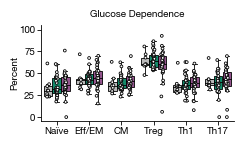

In [36]:
# File path for the SCENITH data
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-CD4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, usecols=['SampleID', 'Group', 'CellType', 'MetCat', 'Percent'])

# Ensure 'Percent' is numeric and drop NaN values
df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')
df = df.dropna(subset=['Percent'])

# Remove 'CD4 T' and 'CD4' from the 'CellType' column and then strip any extra spaces
df['CellType'] = df['CellType'].str.replace('CD4 T ', '').str.replace('CD4', '').str.strip()

# Filter the data to include only 'Gluc Dep' (Glucose Dependence)
df_gluc_dep = df[df['MetCat'] == 'Gluc Dep']

# Define the cell type order based on preference
cell_type_order = ['Naïve', 'Eff/EM', 'CM', 'Treg', 'Th1', 'Th17']

# Set up the plot dimensions
fig, ax = plt.subplots(figsize=(2.5, 1.25))

# Create the boxplot for Glucose Dependence
sns.boxplot(
    x='CellType', y='Percent', hue='Group', data=df_gluc_dep, 
    order=cell_type_order,
    palette={'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'},
    showfliers=False,
    boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6},
    capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}
)

# Overlay the individual points using a stripplot
sns.stripplot(
    x='CellType', y='Percent', hue='Group', data=df_gluc_dep,
    order=cell_type_order, jitter=True, dodge=True, marker='o',
    size=2, palette=['white'], edgecolor='black', linewidth=0.6
)

# Remove the legend
plt.gca().legend_.remove()

# Customize spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Set y-axis limits and tick labels
plt.ylim(-5, 105)
plt.yticks([0, 25, 50, 75, 100])

# Adjust x-tick and y-tick padding
plt.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)
plt.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)

# Adjust y-axis label position
plt.ylabel('Percent', labelpad=0)

# Add title
plt.title('Glucose Dependence')

# Set the x-axis label to an empty string
plt.xlabel('')

# Perform Kruskal-Wallis test for each cell type and display results
for cell_type in cell_type_order:
    subset = df_gluc_dep[df_gluc_dep['CellType'] == cell_type]
    
    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Percent'],
        subset[subset['Group'] == 'CI-NS']['Percent'],
        subset[subset['Group'] == 'CI-Sep']['Percent']
    )
    print(f'{cell_type} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Percent', group_col='Group', p_adjust='bonferroni'
    )
    print(f"{cell_type} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Save and show the plot
plt.savefig(f'{output_dir}scenith_glucdep.svg', format='svg')
plt.show()


Naïve - Kruskal-Wallis H-statistic: 24.69, p-value: 0.0000
Naïve - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.005718  0.030490
CI-Sep  0.005718  1.000000  0.000009
NHC     0.030490  0.000009  1.000000

Eff/EM - Kruskal-Wallis H-statistic: 5.87, p-value: 0.0532
Eff/EM - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.074108  1.000000
CI-Sep  0.074108  1.000000  0.335614
NHC     1.000000  0.335614  1.000000

CM - Kruskal-Wallis H-statistic: 17.03, p-value: 0.0002
CM - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.033931  0.086985
CI-Sep  0.033931  1.000000  0.000282
NHC     0.086985  0.000282  1.000000

Treg - Kruskal-Wallis H-statistic: 22.44, p-value: 0.0000
Treg - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.031006  0.012141
CI-Sep  0.031006  1.000000  0.000012
NHC     0.012141  0.000012  1.000000

Th1 - Kruskal-Wallis H-

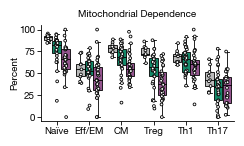

In [37]:
# File path for the SCENITH data
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-CD4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, usecols=['SampleID', 'Group', 'CellType', 'MetCat', 'Percent'])

# Ensure 'Percent' is numeric and drop NaN values
df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')
df = df.dropna(subset=['Percent'])

# Remove 'CD4 T' and 'CD4' from the 'CellType' column and then strip any extra spaces
df['CellType'] = df['CellType'].str.replace('CD4 T ', '').str.replace('CD4', '').str.strip()

# Filter the data to include only 'Mito Dep' (Mitochondrial Dependence)
df_mito_dep = df[df['MetCat'] == 'Mito Dep']

# Define the cell type order based on preference
cell_type_order = ['Naïve', 'Eff/EM', 'CM', 'Treg', 'Th1', 'Th17']

# Set up the plot dimensions
fig, ax = plt.subplots(figsize=(2.5, 1.25))

# Create the boxplot for Mitochondrial Dependence
sns.boxplot(
    x='CellType', y='Percent', hue='Group', data=df_mito_dep, 
    order=cell_type_order,
    palette={'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'},
    showfliers=False,
    boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6},
    capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}
)

# Overlay the individual points using a stripplot
sns.stripplot(
    x='CellType', y='Percent', hue='Group', data=df_mito_dep,
    order=cell_type_order, jitter=True, dodge=True, marker='o',
    size=2, palette=['white'], edgecolor='black', linewidth=0.6
)

# Remove the legend
plt.gca().legend_.remove()

# Customize spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Set y-axis limits and tick labels
plt.ylim(-5, 105)
plt.yticks([0, 25, 50, 75, 100])

# Adjust x-tick and y-tick padding
plt.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)
plt.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)

# Adjust y-axis label position
plt.ylabel('Percent', labelpad=0)

# Add title
plt.title('Mitochondrial Dependence')

# Set the x-axis label to an empty string
plt.xlabel('')

# Perform Kruskal-Wallis test for each cell type and display results
for cell_type in cell_type_order:
    subset = df_mito_dep[df_mito_dep['CellType'] == cell_type]
    
    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Percent'],
        subset[subset['Group'] == 'CI-NS']['Percent'],
        subset[subset['Group'] == 'CI-Sep']['Percent']
    )
    print(f'{cell_type} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Percent', group_col='Group', p_adjust='bonferroni'
    )
    print(f"{cell_type} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Save and show the plot
plt.savefig(f'{output_dir}scenith_mitodep.svg', format='svg')
plt.show()

Naïve - Kruskal-Wallis H-statistic: 24.69, p-value: 0.0000
Naïve - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.005718  0.030490
CI-Sep  0.005718  1.000000  0.000009
NHC     0.030490  0.000009  1.000000

Eff/EM - Kruskal-Wallis H-statistic: 5.87, p-value: 0.0532
Eff/EM - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.074108  1.000000
CI-Sep  0.074108  1.000000  0.335614
NHC     1.000000  0.335614  1.000000

CM - Kruskal-Wallis H-statistic: 17.03, p-value: 0.0002
CM - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.033931  0.086985
CI-Sep  0.033931  1.000000  0.000282
NHC     0.086985  0.000282  1.000000

Treg - Kruskal-Wallis H-statistic: 22.44, p-value: 0.0000
Treg - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.031006  0.012141
CI-Sep  0.031006  1.000000  0.000012
NHC     0.012141  0.000012  1.000000

Th1 - Kruskal-Wallis H-

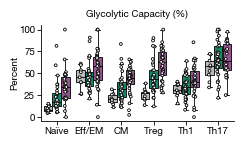

In [50]:
# File path for the SCENITH data
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-CD4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, usecols=['SampleID', 'Group', 'CellType', 'MetCat', 'Percent'])

# Ensure 'Percent' is numeric and drop NaN values
df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')
df = df.dropna(subset=['Percent'])

# Remove 'CD4 T' and 'CD4' from the 'CellType' column and then strip any extra spaces
df['CellType'] = df['CellType'].str.replace('CD4 T ', '').str.replace('CD4', '').str.strip()

# Filter the data to include only 'Glyco Cap' (Glycolytic Capacity)
df_glyco_cap = df[df['MetCat'] == 'Glyco Cap']

# Define the cell type order based on preference
cell_type_order = ['Naïve', 'Eff/EM', 'CM', 'Treg', 'Th1', 'Th17']

# Set up the plot dimensions
fig, ax = plt.subplots(figsize=(2.5, 1.25))

# Create the boxplot for Glycolytic Capacity
sns.boxplot(
    x='CellType', y='Percent', hue='Group', data=df_glyco_cap, 
    order=cell_type_order,
    palette={'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'},
    showfliers=False,
    boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6},
    capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}
)

# Overlay the individual points using a stripplot
sns.stripplot(
    x='CellType', y='Percent', hue='Group', data=df_glyco_cap,
    order=cell_type_order, jitter=True, dodge=True, marker='o',
    size=2, palette=['white'], edgecolor='black', linewidth=0.6
)

# Remove the legend
plt.gca().legend_.remove()

# Customize spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Set y-axis limits and tick labels
plt.ylim(-5, 105)
plt.yticks([0, 25, 50, 75, 100])

# Adjust x-tick and y-tick padding
plt.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)
plt.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)

# Adjust y-axis label position
plt.ylabel('Percent', labelpad=0)

# Add title
plt.title('Glycolytic Capacity (%)')

# Set the x-axis label to an empty string
plt.xlabel('')

# Perform Kruskal-Wallis test for each cell type and display results
for cell_type in cell_type_order:
    subset = df_glyco_cap[df_glyco_cap['CellType'] == cell_type]
    
    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Percent'],
        subset[subset['Group'] == 'CI-NS']['Percent'],
        subset[subset['Group'] == 'CI-Sep']['Percent']
    )
    print(f'{cell_type} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Percent', group_col='Group', p_adjust='bonferroni'
    )
    print(f"{cell_type} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Save and show the plot
plt.savefig(f'{output_dir}scenith_glycocap.svg', format='svg')
plt.show()

Naïve - Kruskal-Wallis H-statistic: 11.12, p-value: 0.0038
Naïve - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.166729  0.171278
CI-Sep  0.166729  1.000000  0.004040
NHC     0.171278  0.004040  1.000000

Eff/EM - Kruskal-Wallis H-statistic: 9.98, p-value: 0.0068
Eff/EM - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.016166
CI-Sep  1.000000  1.000000  0.005759
NHC     0.016166  0.005759  1.000000

CM - Kruskal-Wallis H-statistic: 16.89, p-value: 0.0002
CM - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.129721  0.023426
CI-Sep  0.129721  1.000000  0.000160
NHC     0.023426  0.000160  1.000000

Treg - Kruskal-Wallis H-statistic: 15.88, p-value: 0.0004
Treg - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.080543  0.054062
CI-Sep  0.080543  1.000000  0.000328
NHC     0.054062  0.000328  1.000000

Th1 - Kruskal-Wallis H-

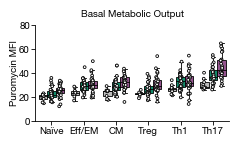

In [39]:
# File path for the new SCENITH data with Puro_MFI
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-T-puro-only.csv'

# Read the CSV file into a DataFrame
df_puro = pd.read_csv(file_path, usecols=['SampleID', 'Group', 'CellType', 'Puro_MFI'])

# Ensure 'Puro_MFI' is numeric and drop NaN values
df_puro['Puro_MFI'] = pd.to_numeric(df_puro['Puro_MFI'], errors='coerce')
df_puro = df_puro.dropna(subset=['Puro_MFI'])

# Remove 'CD4 T' and 'CD4' from the 'CellType' column and then strip any extra spaces
df_puro['CellType'] = df_puro['CellType'].str.replace('CD4 T ', '').str.replace('CD4', '').str.strip()

# Define the cell type order based on preference
cell_type_order = ['Naïve', 'Eff/EM', 'CM', 'Treg', 'Th1', 'Th17']

# Define the group order
group_order = ['NHC', 'CI-NS', 'CI-Sep']

# Set up the plot dimensions
fig, ax = plt.subplots(figsize=(2.5, 1.25))

# Create the boxplot for Puromycin MFI
sns.boxplot(
    x='CellType', y='Puro_MFI', hue='Group', data=df_puro, 
    order=cell_type_order,
    hue_order=group_order,
    palette={'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'},
    showfliers=False,
    boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6},
    capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}
)

# Overlay the individual points using a stripplot
sns.stripplot(
    x='CellType', y='Puro_MFI', hue='Group', data=df_puro,
    order=cell_type_order, hue_order=group_order, jitter=True, dodge=True, marker='o',
    size=2, palette=['white'], edgecolor='black', linewidth=0.6
)

# Remove the legend
plt.gca().legend_.remove()

# Customize spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Set y-axis limits and tick labels
plt.ylim(0, 80)
plt.yticks([0, 20, 40, 60, 80])

# Adjust x-tick and y-tick padding
plt.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)
plt.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)

# Adjust y-axis label position
plt.ylabel('Puromycin MFI', labelpad=0)

# Add title
plt.title('Basal Metabolic Output')

# Set the x-axis label to an empty string
plt.xlabel('')

# Perform Kruskal-Wallis test for each cell type and display results
for cell_type in cell_type_order:
    subset = df_puro[df_puro['CellType'] == cell_type]
    
    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Puro_MFI'],
        subset[subset['Group'] == 'CI-NS']['Puro_MFI'],
        subset[subset['Group'] == 'CI-Sep']['Puro_MFI']
    )
    print(f'{cell_type} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Puro_MFI', group_col='Group', p_adjust='bonferroni'
    )
    print(f"{cell_type} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Save and show the plot
plt.savefig(f'{output_dir}scenith_puromfi.svg', format='svg')
plt.show()

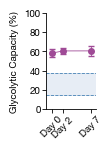

In [17]:
# File path for the new SCENITH data
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/scenith_d0-2-7_treg_glycocap.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only CI-Sep
filtered_df = df[df['Group'] == 'CI-Sep'].copy()

# Ensure 'Percent' is numeric and drop rows with NaN or non-numeric values
filtered_df['Percent'] = pd.to_numeric(filtered_df['Percent'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['Percent'])

# Calculate means and SEM for each day
mean_sem_df = filtered_df.groupby('Day')['Percent'].agg(['mean', sem]).reset_index()

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Shaded region represents mean ±2 standard deviations of the NHC Treg glycolytic capacity
ax.axhspan(14.65, 38.15, color='lightsteelblue', alpha=0.3, zorder=0)
ax.axhline(y=14.65, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)
ax.axhline(y=38.15, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)

# Plot the line chart for CI-Sep
ax.errorbar(
    mean_sem_df['Day'], mean_sem_df['mean'], yerr=mean_sem_df['sem'],
    label='CI-Sep', color='#9F4A96', fmt='-o', capsize=2, linewidth=0.6, markersize=4
)

# Set x-axis limits and labels with extra space
ax.set_xlim(-1, 8)  # Extends x-axis slightly before day 0 and after day 7
ax.set_xticks([0, 2, 7])
ax.set_xticklabels(['Day 0', 'Day 2', 'Day 7'], rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', fontsize=7)

# Adjust y-axis limits and ticks
ax.set_ylim(0, 100)  # Adjusted limit based on assumed range for the Percent values
ax.set_yticks(np.arange(0, 101, 20))

# Adjust tick parameters
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Save and show the plot
plt.savefig(f'{output_dir}scenith_glycocap_d027_cisep.svg', format='svg')
plt.show()

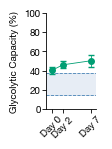

In [18]:
# File path for the new SCENITH data
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/scenith_d0-2-7_treg_glycocap.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only CI-NS
filtered_df = df[df['Group'] == 'CI-NS'].copy()

# Ensure 'Percent' is numeric and drop rows with NaN or non-numeric values
filtered_df['Percent'] = pd.to_numeric(filtered_df['Percent'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['Percent'])

# Calculate means and SEM for each day
mean_sem_df = filtered_df.groupby('Day')['Percent'].agg(['mean', sem]).reset_index()

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Shaded region represents mean ±2 standard deviations of the NHC Treg glycolytic capacity
ax.axhspan(14.65, 38.15, color='lightsteelblue', alpha=0.3, zorder=0)
ax.axhline(y=14.65, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)
ax.axhline(y=38.15, linestyle='--', color='steelblue', linewidth=0.6, zorder=0)

# Plot the line chart for CI-NS
ax.errorbar(
    mean_sem_df['Day'], mean_sem_df['mean'], yerr=mean_sem_df['sem'],
    label='CI-NS', color='#009E73', fmt='-o', capsize=2, linewidth=0.6, markersize=4
)

# Set x-axis limits and labels with extra space
ax.set_xlim(-1, 8)  # Extends x-axis slightly before day 0 and after day 7
ax.set_xticks([0, 2, 7])
ax.set_xticklabels(['Day 0', 'Day 2', 'Day 7'], rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', fontsize=7)

# Adjust y-axis limits and ticks
ax.set_ylim(0, 100)  # Adjusted limit based on assumed range for the Percent values
ax.set_yticks(np.arange(0, 101, 20))

# Adjust tick parameters
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Save and show the plot
plt.savefig(f'{output_dir}scenith_glycocap_d027_cins.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 0.15, p-value: 0.9255
Dunn’s Post-hoc Test Results:
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0



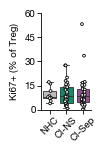

In [19]:
# File path for the new data
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Treg-Stats.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'pct_ki67' is numeric and drop NaN values
filtered_df['pct_ki67'] = pd.to_numeric(filtered_df['pct_ki67'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['pct_ki67'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = ['#BBBBBB', '#009E73', '#9F4A96']

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.65, 1.25))

# Plot box plot
sns.boxplot(
    data=filtered_df, x='Group', y='pct_ki67', order=group_order,
    palette=group_palette, ax=ax, width=0.75, linewidth=0.6,
    fliersize=0, zorder=2  # Hide outliers, set zorder
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='pct_ki67', order=group_order,
    jitter=True, marker='o', size=2, color='white', 
    edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Ki67+ (% of Treg)')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 60)  # Adjusted y-axis limit
ax.set_yticks(np.arange(0, 61, 15))  # Ticks every 15

# Remove title
ax.set_title('')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['pct_ki67'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['pct_ki67'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['pct_ki67']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='pct_ki67', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 50  # Start position for comparison bars
    offset_increment = 2.5  # Incremental offset for each comparison bar

    # Define pairs for pairwise comparison bars
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    # Iterate through pairs and add lines if Dunn's p < 0.25
    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]

        if p_val < 0.25:
            # Calculate the y-position for the current bar
            current_y = base_y + (idx * offset_increment)

            # Add comparison line
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)

            # Add p-value text
            ax.text((start + end) / 2, current_y + 1, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig(f'{output_dir}treg_ki67.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 21.65, p-value: 0.0000
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.013215  0.037954
CI-Sep  0.013215  1.000000  0.000029
NHC     0.037954  0.000029  1.000000



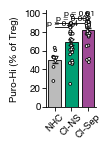

In [54]:
# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/Combined_PuroHi_Treg_Oligo.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'pct_purohi' is numeric and drop NaN values
filtered_df['pct_purohi'] = pd.to_numeric(filtered_df['pct_purohi'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['pct_purohi'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = ['#BBBBBB', '#009E73', '#9F4A96']

# Calculate mean and SEM for each group
mean_sem_df = filtered_df.groupby('Group')['pct_purohi'].agg(['mean', sem]).reindex(group_order)

# Set up plot dimensions and x-tick positions
fig, ax = plt.subplots(figsize=(0.65, 1.25))
bar_width = 0.75
x_positions = np.arange(len(group_order))

# Plot bar plot with error bars
ax.bar(
    x=x_positions, height=mean_sem_df['mean'], yerr=mean_sem_df['sem'], 
    capsize=2, color=group_palette, edgecolor='black', linewidth=0.6, 
    width=bar_width
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='pct_purohi', order=group_order,
    jitter=True, marker='o', size=2, color='white', 
    edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Puro-Hi (% of Treg)')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 103)  # Adjusted based on typical percentage values
ax.set_yticks(np.arange(0, 104, 20))

# Remove title
ax.set_title('')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['pct_purohi'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['pct_purohi'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['pct_purohi']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='pct_purohi', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 85  # Start position for comparison bars
    offset_increment = 5  # Incremental offset for each comparison bar

    # Define pairs for pairwise comparison bars
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    # Iterate through pairs and add lines if Dunn's p < 0.25
    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]

        if p_val < 0.25:
            # Calculate the y-position for the current bar
            current_y = base_y + (idx * offset_increment)

            # Add comparison line
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)

            # Add p-value text
            ax.text((start + end) / 2, current_y + 1, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig(f'{output_dir}treg_purohi.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 10.98, p-value: 0.0041
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.119899  0.249625
CI-Sep  0.119899  1.000000  0.005271
NHC     0.249625  0.005271  1.000000



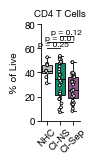

In [66]:
# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Tcell-Stats_python-input.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'cd4_pct_live' is numeric and drop NaN values
filtered_df['cd4_pct_live'] = pd.to_numeric(filtered_df['cd4_pct_live'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['cd4_pct_live'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.5, 1.25))

# Create boxplot with defined style
sns.boxplot(
    data=filtered_df, x='Group', y='cd4_pct_live', order=group_order, palette=group_palette,
    showfliers=False, boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6}, capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}, width=0.75, ax=ax
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='cd4_pct_live', order=group_order,
    jitter=True, marker='o', size=2, color='white', edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(np.arange(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('% of Live')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 80)
ax.set_yticks(np.arange(0, 81, 20))

# Remove title
ax.set_title('CD4 T Cells')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['cd4_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['cd4_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['cd4_pct_live']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='cd4_pct_live', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 60
    offset_increment = 5
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
        if p_val < 0.25:
            current_y = base_y + (idx * offset_increment)
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
            ax.text((start + end) / 2, current_y + 1, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig('pctlive_cd4.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 6.14, p-value: 0.0464
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.046377
CI-Sep  1.000000  1.000000  0.081601
NHC     0.046377  0.081601  1.000000



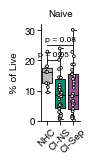

In [79]:
# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Tcell-Stats_python-input.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'naive_pct_live' is numeric and drop NaN values
filtered_df['naive_pct_live'] = pd.to_numeric(filtered_df['naive_pct_live'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['naive_pct_live'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.5, 1.25))

# Create boxplot with defined style
sns.boxplot(
    data=filtered_df, x='Group', y='naive_pct_live', order=group_order, palette=group_palette,
    showfliers=False, boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6}, capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}, width=0.75, ax=ax
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='naive_pct_live', order=group_order,
    jitter=True, marker='o', size=2, color='white', edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(np.arange(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('% of Live')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 32)
ax.set_yticks(np.arange(0, 31, 10))

# Set title
ax.set_title('Naive')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['naive_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['naive_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['naive_pct_live']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='naive_pct_live', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 20
    offset_increment = 5
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
        if p_val < 0.25:
            current_y = base_y + (idx * offset_increment)
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
            ax.text((start + end) / 2, current_y + 1, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig('pctlive_naive.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 16.47, p-value: 0.0003
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.004997  0.556821
CI-Sep  0.004997  1.000000  0.001675
NHC     0.556821  0.001675  1.000000



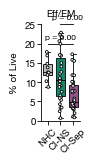

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import scikit_posthocs as sp

# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Tcell-Stats_python-input.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'effem_pct_live' is numeric and drop NaN values
filtered_df['effem_pct_live'] = pd.to_numeric(filtered_df['effem_pct_live'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['effem_pct_live'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.5, 1.25))

# Create boxplot with defined style
sns.boxplot(
    data=filtered_df, x='Group', y='effem_pct_live', order=group_order, palette=group_palette,
    showfliers=False, boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6}, capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}, width=0.75, ax=ax
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='effem_pct_live', order=group_order,
    jitter=True, marker='o', size=2, color='white', edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(np.arange(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('% of Live')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 25)
ax.set_yticks(np.arange(0, 26, 5))

# Set title
ax.set_title('Eff/EM')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['effem_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['effem_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['effem_pct_live']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='effem_pct_live', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 15
    offset_increment = 5
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
        if p_val < 0.25:
            current_y = base_y + (idx * offset_increment)
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
            ax.text((start + end) / 2, current_y + 1, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig('pctlive_effem.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 1.90, p-value: 0.3864
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep  NHC
CI-NS   1.000000  0.627887  1.0
CI-Sep  0.627887  1.000000  1.0
NHC     1.000000  1.000000  1.0



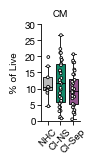

In [81]:
# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Tcell-Stats_python-input.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'cm_pct_live' is numeric and drop NaN values
filtered_df['cm_pct_live'] = pd.to_numeric(filtered_df['cm_pct_live'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['cm_pct_live'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.5, 1.25))

# Create boxplot with defined style
sns.boxplot(
    data=filtered_df, x='Group', y='cm_pct_live', order=group_order, palette=group_palette,
    showfliers=False, boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6}, capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}, width=0.75, ax=ax
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='cm_pct_live', order=group_order,
    jitter=True, marker='o', size=2, color='white', edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(np.arange(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('% of Live')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 31, 5))

# Set title
ax.set_title('CM')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['cm_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['cm_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['cm_pct_live']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='cm_pct_live', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 70
    offset_increment = 5
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
        if p_val < 0.25:
            current_y = base_y + (idx * offset_increment)
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
            ax.text((start + end) / 2, current_y + 1, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig('pctlive_cm.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 14.15, p-value: 0.0008
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.056505  0.154629
CI-Sep  0.056505  1.000000  0.001186
NHC     0.154629  0.001186  1.000000



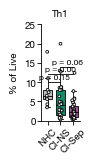

In [92]:
# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Tcell-Stats_python-input.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'th1_pct_live' is numeric and drop NaN values
filtered_df['th1_pct_live'] = pd.to_numeric(filtered_df['th1_pct_live'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['th1_pct_live'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.5, 1.25))

# Create boxplot with defined style
sns.boxplot(
    data=filtered_df, x='Group', y='th1_pct_live', order=group_order, palette=group_palette,
    showfliers=False, boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6}, capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}, width=0.75, ax=ax
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='th1_pct_live', order=group_order,
    jitter=True, marker='o', size=2, color='white', edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(np.arange(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('% of Live')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 25)
ax.set_yticks(np.arange(0, 26, 5))

# Set title
ax.set_title('Th1')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['th1_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['th1_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['th1_pct_live']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='th1_pct_live', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 10
    offset_increment = 2
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
        if p_val < 0.25:
            current_y = base_y + (idx * offset_increment)
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
            ax.text((start + end) / 2, current_y + 0.5, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig('pctlive_th1.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 7.17, p-value: 0.0277
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.671443  0.206678
CI-Sep  0.671443  1.000000  0.024025
NHC     0.206678  0.024025  1.000000



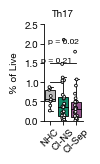

In [89]:
# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Tcell-Stats_python-input.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'th17_pct_live' is numeric and drop NaN values
filtered_df['th17_pct_live'] = pd.to_numeric(filtered_df['th17_pct_live'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['th17_pct_live'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.5, 1.25))

# Create boxplot with defined style
sns.boxplot(
    data=filtered_df, x='Group', y='th17_pct_live', order=group_order, palette=group_palette,
    showfliers=False, boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6}, capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}, width=0.75, ax=ax
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='th17_pct_live', order=group_order,
    jitter=True, marker='o', size=2, color='white', edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(np.arange(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('% of Live')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 2.5)
ax.set_yticks(np.arange(0, 2.6, 0.5))

# Set title
ax.set_title('Th17')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['th17_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['th17_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['th17_pct_live']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='th17_pct_live', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 1
    offset_increment = 0.5
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
        if p_val < 0.25:
            current_y = base_y + (idx * offset_increment)
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
            ax.text((start + end) / 2, current_y + 0.5, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig('pctlive_th17.svg', format='svg')
plt.show()

Kruskal-Wallis H-statistic: 1.09, p-value: 0.5801
Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep  NHC
CI-NS   1.000000  0.890446  1.0
CI-Sep  0.890446  1.000000  1.0
NHC     1.000000  1.000000  1.0



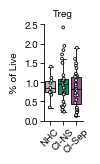

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import scikit_posthocs as sp

# File path for the new dataset
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/2024-05-09_SCENITH_D2-Tcell-Stats_python-input.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the data to include only NHC, CI-NS, and CI-Sep groups
filtered_df = df[df['Group'].isin(['NHC', 'CI-NS', 'CI-Sep'])].copy()

# Ensure 'treg_pct_live' is numeric and drop NaN values
filtered_df['treg_pct_live'] = pd.to_numeric(filtered_df['treg_pct_live'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['treg_pct_live'])

# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Set up plot dimensions
fig, ax = plt.subplots(figsize=(0.5, 1.25))

# Create boxplot with defined style
sns.boxplot(
    data=filtered_df, x='Group', y='treg_pct_live', order=group_order, palette=group_palette,
    showfliers=False, boxprops={'edgecolor': 'black', 'linewidth': 0.6},
    whiskerprops={'color': 'black', 'linewidth': 0.6}, capprops={'color': 'black', 'linewidth': 0.6},
    medianprops={'color': 'black', 'linewidth': 0.6}, width=0.75, ax=ax
)

# Overlay individual data points using a strip plot
sns.stripplot(
    data=filtered_df, x='Group', y='treg_pct_live', order=group_order,
    jitter=True, marker='o', size=2, color='white', edgecolor='black', linewidth=0.6, zorder=3, ax=ax
)

# Adjust x-ticks and labels
ax.set_xticks(np.arange(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('% of Live')
ax.tick_params(axis='y', direction='out', length=3, width=0.6, pad=1)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, pad=1)

# Set y-axis limits and ticks
ax.set_ylim(0, 2.5)
ax.set_yticks(np.arange(0, 2.6, 0.5))

# Set title
ax.set_title('Treg')

# Perform Kruskal-Wallis test
kw_stat, kw_pval = kruskal(
    filtered_df[filtered_df['Group'] == 'NHC']['treg_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-NS']['treg_pct_live'],
    filtered_df[filtered_df['Group'] == 'CI-Sep']['treg_pct_live']
)
print(f'Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')

# Perform Dunn's post-hoc test
posthoc_results = sp.posthoc_dunn(
    filtered_df, val_col='treg_pct_live', group_col='Group', p_adjust='bonferroni'
)
print(f"Dunn’s Post-hoc Test Results:\n{posthoc_results}\n")

# Add comparison bars if K-W p < 0.10
if kw_pval < 0.05:
    base_y = 2.5
    offset_increment = 0.3
    pair_positions = [(0, 1), (0, 2), (1, 2)]
    group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

    for idx, (start, end) in enumerate(pair_positions):
        p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
        if p_val < 0.25:
            current_y = base_y + (idx * offset_increment)
            ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
            ax.text((start + end) / 2, current_y + 0.1, f'p = {p_val:.2f}', 
                    ha='center', va='bottom', fontsize=6, color='black')

# Save and show the plot
plt.savefig('pctlive_treg.svg', format='svg')
plt.show()

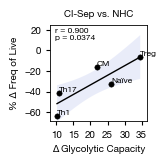

In [8]:
# Load the CSV file into a DataFrame
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/glycocap-vs-freqlive_average.csv'
df = pd.read_csv(file_path)

# Filter data for 'CI-Sep' and the specified cell types, excluding 'Eff/EM'
filtered_df = df[(df['Group'] == 'CI-Sep') & (df['CellType'].isin(['Naïve', 'CM', 'Th1', 'Th17', 'Treg']))]

# Compute Spearman's correlation between delta_glyco_cap and delta_freq_live
correlation, p_value = spearmanr(filtered_df['delta_glyco_cap'], filtered_df['delta_freq_live'])

# Perform linear regression for visualization
slope, intercept, _, _, _ = linregress(filtered_df['delta_glyco_cap'], filtered_df['delta_freq_live'])

# Generate values for the regression line
x_vals = np.linspace(filtered_df['delta_glyco_cap'].min(), filtered_df['delta_glyco_cap'].max(), 100)
y_vals = intercept + slope * x_vals

# Calculate the confidence interval for the regression line
y_pred = intercept + slope * filtered_df['delta_glyco_cap']
sum_errors = np.sum((filtered_df['delta_freq_live'] - y_pred)**2)
len_df = len(filtered_df)
stdev = np.sqrt(1/(len_df - 2) * sum_errors)
ci = 1.96 * stdev * np.sqrt(1/len_df + (x_vals - filtered_df['delta_glyco_cap'].mean())**2 / 
                            np.sum((filtered_df['delta_glyco_cap'] - filtered_df['delta_glyco_cap'].mean())**2))
lower = y_vals - ci
upper = y_vals + ci

# Set up the figure dimensions
plt.figure(figsize=(1.25, 1.25))

# Plot the confidence interval shading without outline
plt.fill_between(x_vals, lower, upper, color='#CAD1F2', alpha=0.4, edgecolor='none')

# Plot the scatter points for CI-Sep in black, with desired size
sns.scatterplot(x='delta_glyco_cap', y='delta_freq_live', data=filtered_df, s=15, color='black', edgecolor='black', zorder=2)

# Plot the regression line in black
plt.plot(x_vals, y_vals, color='black', linewidth=1, zorder=3)

# Annotate the cell types
for i in range(len(filtered_df)):
    plt.text(
        filtered_df.iloc[i]['delta_glyco_cap'], 
        filtered_df.iloc[i]['delta_freq_live'],
        filtered_df.iloc[i]['CellType'],
        horizontalalignment='left', verticalalignment='bottom',
        size=6, color='black', zorder=4
    )

# Overlay the correlation and p-value in the upper left corner
plt.text(0.05, 0.97, f"r = {correlation:.3f}\np = {p_value:.4f}", transform=plt.gca().transAxes, 
         fontsize=6, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0, edgecolor='none'))

# Set axis limits and ticks
plt.xlim(filtered_df['delta_glyco_cap'].min() - 2, filtered_df['delta_glyco_cap'].max() + 2)
plt.ylim(filtered_df['delta_freq_live'].min() - 5, filtered_df['delta_freq_live'].max() + 31)
plt.xticks([10, 15, 20, 25, 30, 35])
plt.yticks([-60, -40, -20, 0, 20])

# Set axis labels
plt.xlabel('Δ Glycolytic Capacity')
plt.ylabel('% Δ Freq of Live')

# Set title
plt.title('CI-Sep vs. NHC')

# Apply borders to all four sides
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)

# Apply tight layout and save the plot
plt.savefig('glycocap-freq-correlation.svg', format='svg')
plt.show()

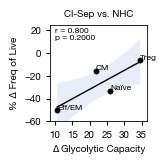

In [7]:
# Load the CSV file into a DataFrame
file_path = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure1/glycocap-vs-freqlive_average.csv'
df = pd.read_csv(file_path)

# Filter data for 'CI-Sep' and the specified cell types, excluding 'Eff/EM'
filtered_df = df[(df['Group'] == 'CI-Sep') & (df['CellType'].isin(['Naïve', 'CM', 'Eff/EM', 'Treg']))]

# Compute Spearman's correlation between delta_glyco_cap and delta_freq_live
correlation, p_value = spearmanr(filtered_df['delta_glyco_cap'], filtered_df['delta_freq_live'])

# Perform linear regression for visualization
slope, intercept, _, _, _ = linregress(filtered_df['delta_glyco_cap'], filtered_df['delta_freq_live'])

# Generate values for the regression line
x_vals = np.linspace(filtered_df['delta_glyco_cap'].min(), filtered_df['delta_glyco_cap'].max(), 100)
y_vals = intercept + slope * x_vals

# Calculate the confidence interval for the regression line
y_pred = intercept + slope * filtered_df['delta_glyco_cap']
sum_errors = np.sum((filtered_df['delta_freq_live'] - y_pred)**2)
len_df = len(filtered_df)
stdev = np.sqrt(1/(len_df - 2) * sum_errors)
ci = 1.96 * stdev * np.sqrt(1/len_df + (x_vals - filtered_df['delta_glyco_cap'].mean())**2 / 
                            np.sum((filtered_df['delta_glyco_cap'] - filtered_df['delta_glyco_cap'].mean())**2))
lower = y_vals - ci
upper = y_vals + ci

# Set up the figure dimensions
plt.figure(figsize=(1.25, 1.25))

# Plot the confidence interval shading without outline
plt.fill_between(x_vals, lower, upper, color='#CAD1F2', alpha=0.4, edgecolor='none')

# Plot the scatter points for CI-Sep in black, with desired size
sns.scatterplot(x='delta_glyco_cap', y='delta_freq_live', data=filtered_df, s=15, color='black', edgecolor='black', zorder=2)

# Plot the regression line in black
plt.plot(x_vals, y_vals, color='black', linewidth=1, zorder=3)

# Annotate the cell types
for i in range(len(filtered_df)):
    plt.text(
        filtered_df.iloc[i]['delta_glyco_cap'], 
        filtered_df.iloc[i]['delta_freq_live'],
        filtered_df.iloc[i]['CellType'],
        horizontalalignment='left', verticalalignment='bottom',
        size=6, color='black', zorder=4
    )

# Overlay the correlation and p-value in the upper left corner
plt.text(0.05, 0.97, f"r = {correlation:.3f}\np = {p_value:.4f}", transform=plt.gca().transAxes, 
         fontsize=6, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0, edgecolor='none'))

# Set axis limits and ticks
plt.xlim(filtered_df['delta_glyco_cap'].min() - 2, filtered_df['delta_glyco_cap'].max() + 2)
plt.ylim(filtered_df['delta_freq_live'].min() - 5, filtered_df['delta_freq_live'].max() + 31)
plt.xticks([10, 15, 20, 25, 30, 35])
plt.yticks([-60, -40, -20, 0, 20])

# Set axis labels
plt.xlabel('Δ Glycolytic Capacity')
plt.ylabel('% Δ Freq of Live')

# Set title
plt.title('CI-Sep vs. NHC')

# Apply borders to all four sides
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)

# Apply tight layout and save the plot
plt.savefig('glycocap-freq-correlation-teffem.svg', format='svg')
plt.show()